In [88]:
%matplotlib inline

#concatenate all ELA features from BBOB functions

#plot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

sets = ["cm_angle","cm_grad","ela_distr","ela_level","ela_meta","basic","disp","nbc","pca","ic"]
allfs = []
headers = ["f"]
setheader = True
for fid in range(1,25):
    for iid in range(1,21):
        feature_list = [fid]
        for s in sets:
            data = pd.read_csv("flaccobbob/fun_"+str(fid)+"_"+s+"_iter_"+str(iid)+".csv", delimiter=',')
            data = data.drop(data.columns[0], axis=1)
            if (setheader):
                headers.extend(data.columns)
                
            #print(len(data.columns))
            #data = data.fillna(0)
            feature_list.extend(data.values.flatten())
        setheader = False
        allfs.append(feature_list)
print(np.array(allfs).shape)
            
np.save("all_flacco_bbob.npy", allfs)

df = pd.DataFrame(allfs, columns=headers) # A is a numpy 2d array
df.to_csv("all_flacco_bbob.csv",index=False)


(480, 108)


In [70]:
#load data
dataset="cifar10"
import math
import pandas as pd
data = pd.read_csv('results/zoomedIn/'+dataset+'-results.log', delimiter=',')
data = data.drop(columns=['stack_0', 'stack_1', 'stack_2', 'filters_1', 'filters_3', 'filters_5','activation', 'activ_dense', 'max_pooling'])
sample = data.values[:,:-2]
obj_values = list(data.values[:,-2])

#from sklearn.preprocessing import normalize
#sample = normalize(sample, axis=0, norm='max')
sample.shape

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-4.99,4.99))
sample = scaler.fit_transform(sample)
from pflacco.pflacco import create_feature_object, calculate_feature_set, calculate_features, flacco, list_available_feature_sets

import numpy as np
# Create feature object
feat_object = create_feature_object(x=sample, minimize=False, lower=-5.0, upper=5.0, y=obj_values, blocks=None)

# Calculate all features
sets = ["cm_angle","cm_grad","ela_distr","ela_level","ela_meta","basic","disp","nbc","pca","ic"]
#mnist = -1, cifar = -2, fashion = -3
ela_features = [-3]
for f in sets:
    temp = calculate_feature_set(feat_object, f)
    #print(temp)
    #print(len(temp.values()))
    for i in list(temp.values()):
        if (not math.isnan(i)):
            #print(i)
            ela_features.append(i)
        else:
            ela_features.append(0)

print(ela_features)
#np.save(dataset+"_flacco_zoomed.npy", ela_features)



[-3, 16.27642371067769, 0, 17.98960390538428, 0, 108.50324343024192, 0, 1.0, 0, 0, 0.021000000007916242, 0.147699997290263, 0, 0, 0.12099999998463318, -1.025434566593966, 1.0263920775305673, 1, 0, 0.010000000009313226, 0.075, 0.08700000000000001, 0.075, 0.8620689655172412, 1.0, 1.1600000000000001, 0.11900000000000001, 0.136, 0.121, 0.875, 0.9834710743801653, 1.1239669421487604, 0.111, 0.112, 0.107, 0.9910714285714286, 1.0373831775700935, 1.046728971962617, 0, 5.961999999999534, 0.7015192995081518, 0.7058142747887585, 8.652966478192127e-05, 0.024554119644214074, 283.7653388129638, 0.8095860158909678, 0.7522311483552557, 135.72545415735567, 1.0, 0, 0.6669999999576248, 23, 1000, -5.0, -5.0, 5.0, 5.0, 0.3253999948501587, 0.8621000051498413, 1, 1, 1, 1, False, 0, 0.0009999999892897904, 0.8996569338705378, 0.9284579636717223, 0.9443370191776306, 0.9689975281871597, 0.897202512691647, 0.92649433064141, 0.9430963769728162, 0.96841476861999, -2.231846027784975, -1.591249059430858, -1.2380646459

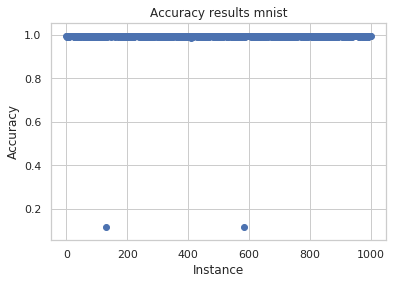

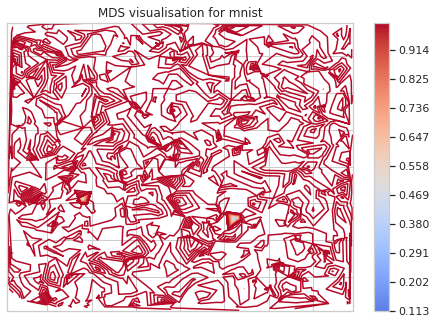

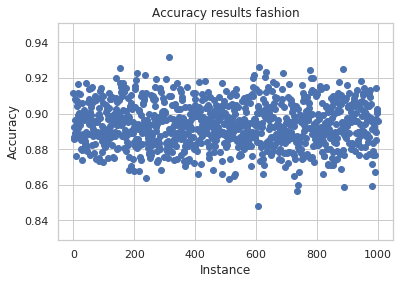

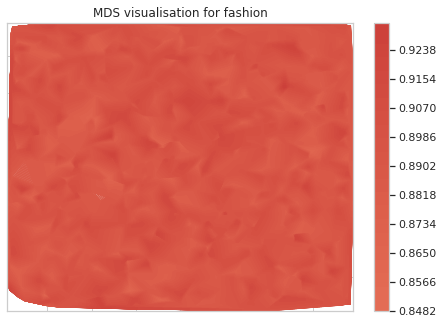

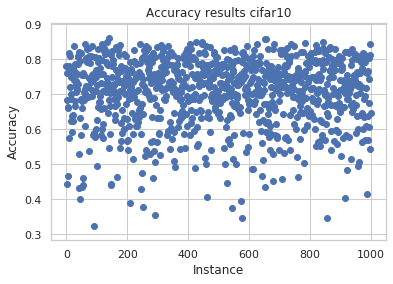

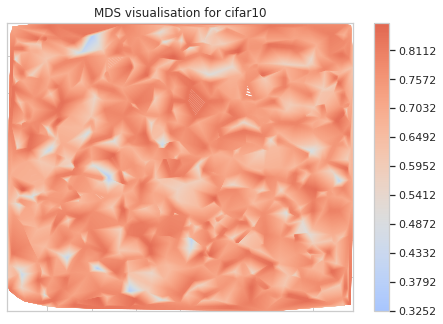

In [28]:


for dataset in ["mnist","fashion","cifar10"]:
    data = pd.read_csv('results/zoomedIn/'+dataset+'-results.log', delimiter=',')
    data['filters_1'] = data['filters_2']
    data['filters_2'] = data['filters_4']
    data = data.drop(columns=['stack_0', 'stack_1', 'stack_2','activation', 'activ_dense', 'max_pooling', 'filters_3', 'filters_4','filters_5'])
    
    
    sample = data.values[:,:-2]
    obj_values = list(data.values[:,-2])
    
    plt.title("Accuracy results "+dataset)
    plt.scatter(np.arange(len(obj_values)),obj_values)
    plt.ylabel("Accuracy")
    plt.xlabel("Instance")
    plt.show()
    
    similarities = euclidean_distances(sample)
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=42,
                   dissimilarity="precomputed", n_jobs=5)
    
    pos = mds.fit(similarities).embedding_

    # Rescale the data
    pos *= np.sqrt((sample ** 2).sum()) / np.sqrt((pos ** 2).sum())
    # Rotate the data
    clf = PCA(n_components=2)
    pos = clf.fit_transform(pos)
    #rotation matrix
    t = np.array([[0.939, -0.342],[0.342, 0.939]]) 
    pos = np.dot(pos, t)

    #if (dataset=="cifar10"):
    #    obj_values = np.array(obj_values) * 2

    fig = plt.figure(1)
    ax = plt.axes([0., 0., 1., 1.])
    plt.title("MDS visualisation for "+dataset)
    s = 100
    #plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
    plt.tricontour(pos[:, 0], pos[:, 1], obj_values, vmin = 0., vmax = 1.01, levels=1000, cmap='coolwarm');
    plt.colorbar()
    plt.clim(0,1)
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    plt.show()
    
    

                  perf      time
s_0          -0.034918 -0.239536
s_1          -0.007539 -0.056320
s_2           0.025624 -0.055359
filters_0     0.014786  0.291497
filters_1    -0.014297  0.059579
filters_2    -0.015172  0.001716
k_0           0.002470  0.678079
k_1           0.004622 -0.012422
k_2          -0.031297  0.228764
k_3           0.008950 -0.012742
k_4          -0.020613  0.064301
k_5           0.002741 -0.073959
dropout_0     0.008130  0.027620
dropout_1     0.037420  0.001732
dropout_2    -0.016258 -0.004726
dropout_3     0.012024 -0.087767
dropout_4     0.022681  0.018876
dropout_5    -0.003811 -0.007802
dropout_6     0.006252 -0.035051
lr           -0.032351 -0.002488
l2           -0.079485  0.017984
dense_size_0  0.022621 -0.007238
dense_size_1 -0.010941  0.019489
perf          1.000000  0.025769
time          0.025769  1.000000


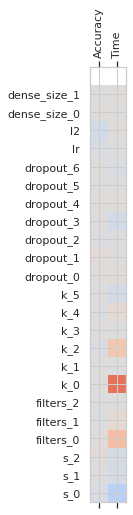

                  perf      time
s_0          -0.014944 -0.240944
s_1          -0.124290 -0.058820
s_2           0.019261 -0.058772
filters_0    -0.022091  0.290809
filters_1    -0.061912  0.059835
filters_2     0.072643  0.003386
k_0           0.171513  0.678885
k_1           0.007139 -0.012499
k_2           0.306258  0.232581
k_3           0.216232 -0.015937
k_4          -0.013258  0.062896
k_5           0.060940 -0.073555
dropout_0    -0.531863  0.026118
dropout_1    -0.071451  0.003474
dropout_2     0.028491 -0.003966
dropout_3     0.032492 -0.086830
dropout_4    -0.003433  0.019756
dropout_5     0.017524 -0.009814
dropout_6     0.048557 -0.034349
lr            0.216229 -0.002609
l2           -0.590792  0.018148
dense_size_0 -0.005501 -0.008123
dense_size_1  0.002057  0.018610
perf          1.000000  0.153684
time          0.153684  1.000000


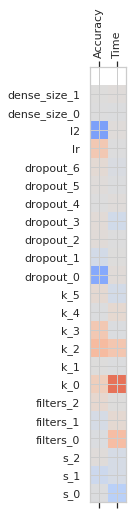

                  perf      time
s_0          -0.149543 -0.223347
s_1          -0.103874 -0.037215
s_2           0.011963 -0.076690
filters_0    -0.048959  0.389752
filters_1    -0.085888  0.066556
filters_2     0.068510  0.016126
k_0           0.188453  0.498615
k_1           0.056883 -0.014812
k_2           0.141438  0.201515
k_3           0.085472 -0.005909
k_4          -0.023290  0.067045
k_5           0.038732 -0.029163
dropout_0    -0.747063  0.020027
dropout_1    -0.009004  0.009484
dropout_2    -0.007906 -0.035628
dropout_3     0.054067 -0.059125
dropout_4    -0.013416  0.022646
dropout_5     0.049866 -0.000916
dropout_6     0.065483 -0.047755
lr            0.161470  0.005661
l2           -0.171282  0.012600
dense_size_0  0.016710 -0.002537
dense_size_1 -0.020229  0.029579
perf          1.000000  0.130672
time          0.130672  1.000000


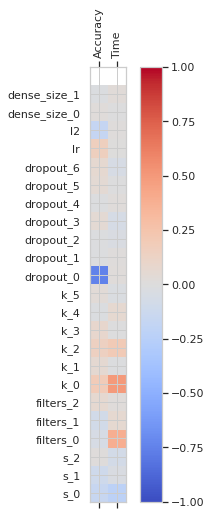

correlation between correlations
            mnist   fashion   cifar10
mnist    1.000000  0.735049  0.754014
fashion  0.735049  1.000000  0.917883
cifar10  0.754014  0.917883  1.000000


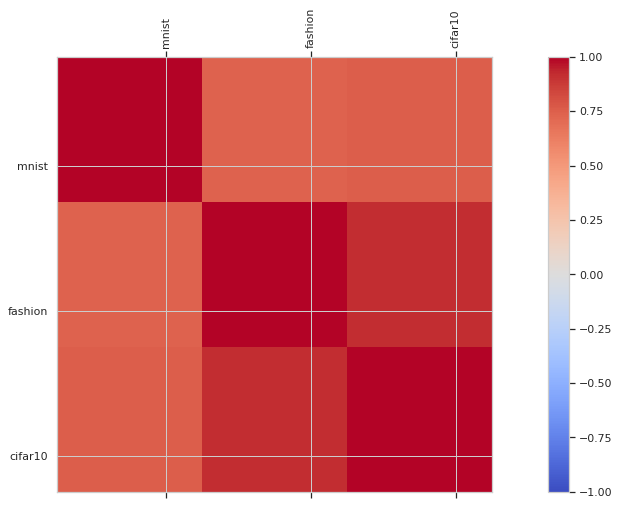

In [38]:
perf_cors = []

for dataset in ["mnist","fashion","cifar10"]:
    data = pd.read_csv('results/zoomedIn/'+dataset+'-results.log', delimiter=',')
    data['filters_1'] = data['filters_2']
    data['filters_2'] = data['filters_4']
    data = data.drop(columns=['stack_0', 'stack_1', 'stack_2','activation', 'activ_dense', 'max_pooling', 'filters_3', 'filters_4','filters_5'])
    
    
    sample = data.values[:,:-2]
    obj_values = list(data.values[:,-2])
    
    corr = data[data.columns[:]].corr()[data.columns[-2:]][:]
    perf_cors.append(corr['perf'].values)
    print(corr)
    corr = corr.values[:-2]
    fig = plt.figure(figsize=(5,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    if (dataset == "cifar10"):
        fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns)-2,1)

    ax.set_xticks(ticks[:2])
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(['Accuracy','Time'])
    ax.set_yticklabels(data.columns[:-2])
    ax.set_ylim([-0.5,23.5])
    plt.savefig("corr-"+dataset+"-2.pdf")
    plt.show()

print("correlation between correlations")
perf_cors = np.array(perf_cors).T
d = pd.DataFrame(perf_cors, columns=["mnist","fashion","cifar10"])
print(d.corr())
corr = d.corr()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0.25,len(d.columns)+.25,1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(d.columns)
ax.set_yticklabels(d.columns)
plt.show()

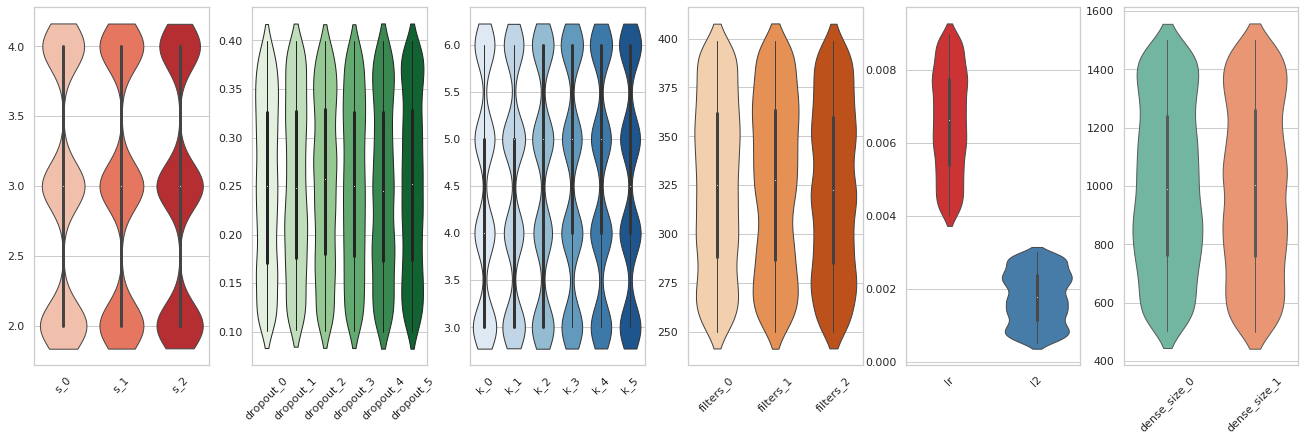

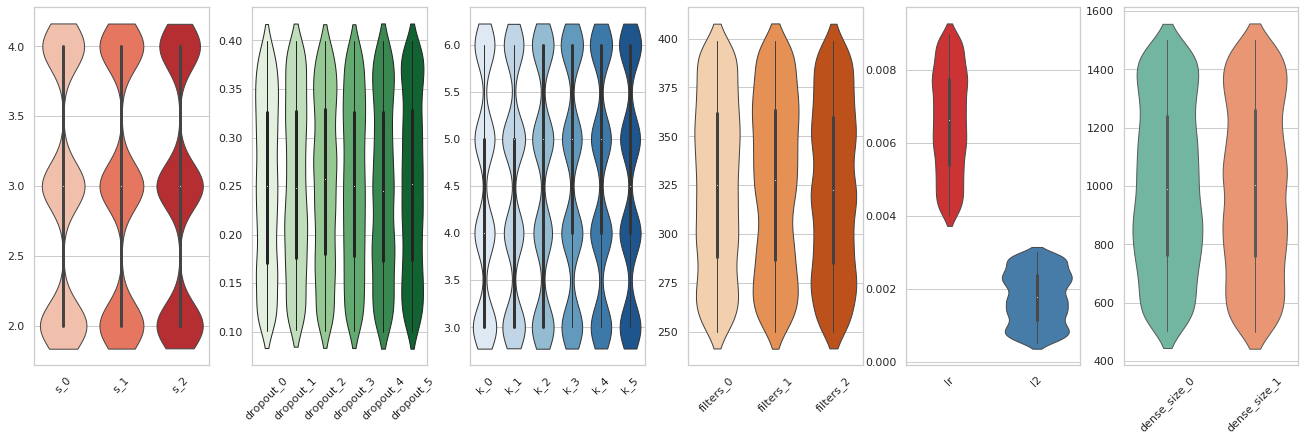

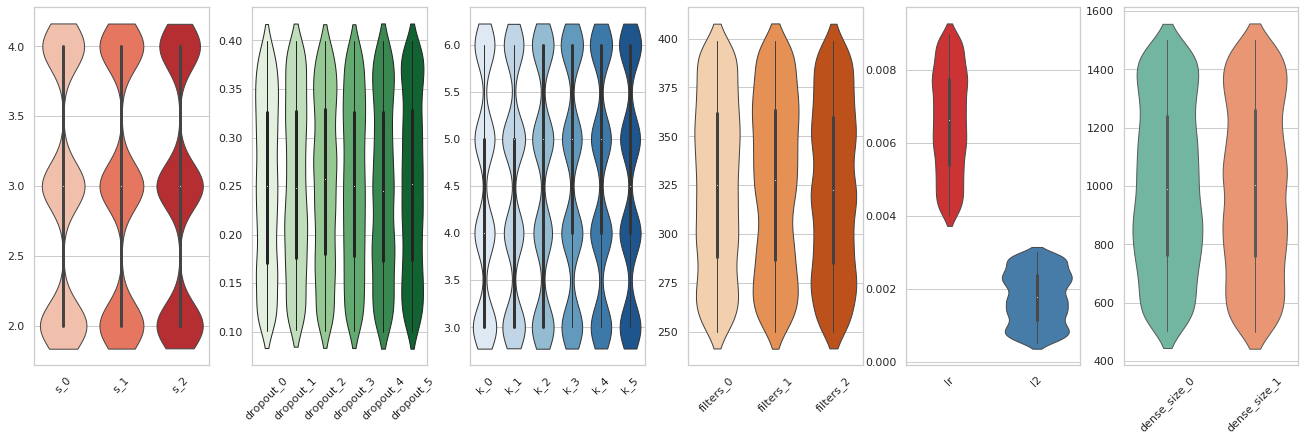

In [31]:
#boxplots
import seaborn as sns
sns.set(style="whitegrid")

for dataset in ["mnist","fashion","cifar10"]:
    data = pd.read_csv('results/zoomedIn/'+dataset+'-results.log', delimiter=',')
    data['filters_1'] = data['filters_2']
    data['filters_2'] = data['filters_4']
    data = data.drop(columns=['stack_0', 'stack_1', 'stack_2','activation', 'activ_dense', 'max_pooling', 'filters_3', 'filters_4','filters_5'])
    sample = data.values[:,:-2]
    obj_values = list(data.values[:,-2])
    
    #data.boxplot(rot=90, figsize=[18,8], column=['s_0','s_1','s_2'])
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(1,6,figsize=(18, 6))

    sns.violinplot(ax = ax[0], data=data[['s_0','s_1','s_2']], palette="Reds", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[1], data=data[['dropout_0','dropout_1','dropout_2','dropout_3','dropout_4','dropout_5']], palette="Greens", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[2], data=data[['k_0','k_1','k_2','k_3','k_4','k_5']], palette="Blues", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[3], data=data[['filters_0','filters_1','filters_2']], palette="Oranges", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[4], data=data[['lr','l2']], palette="Set1", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[5], data=data[['dense_size_0','dense_size_1']], palette="Set2", bw=.2, cut=1, linewidth=1)
    for a in ax:
        a.set_xticklabels(a.get_xticklabels(),rotation=45)
    f.tight_layout(pad=0.2)
    # Finalize the figure
    #ax.set(ylim=(-.7, 1.05))
    #sns.despine(left=True, bottom=True)
    
    plt.show()


44


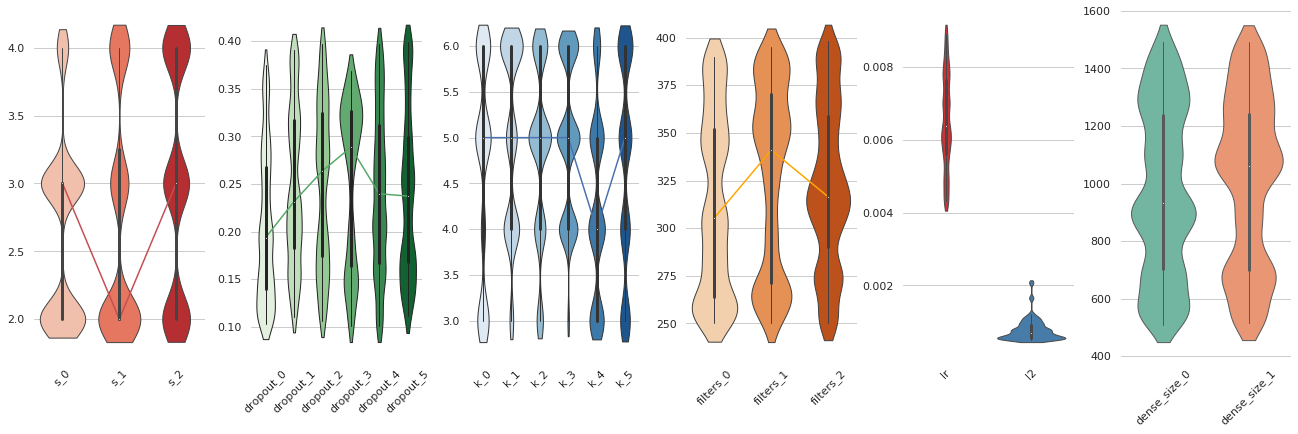

50


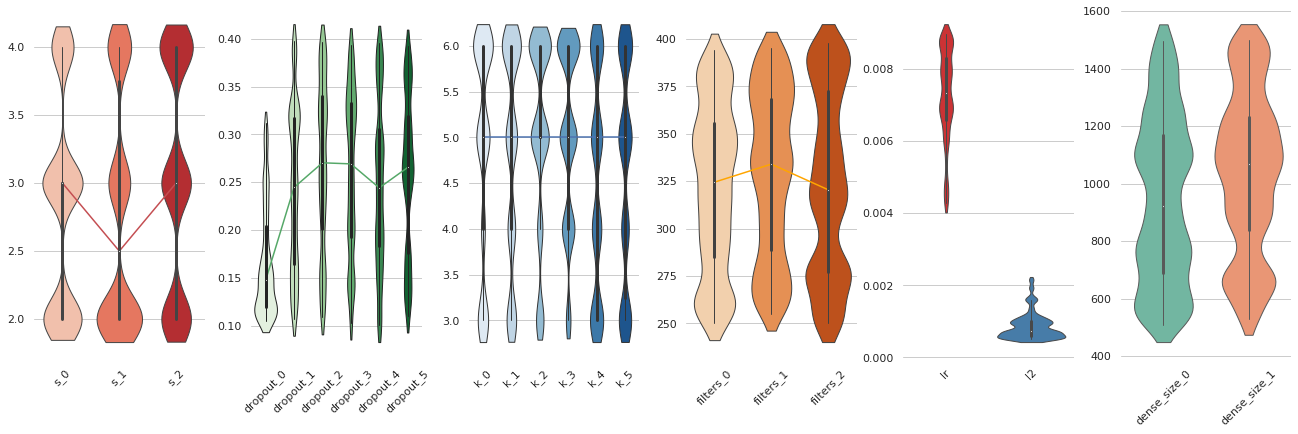

50


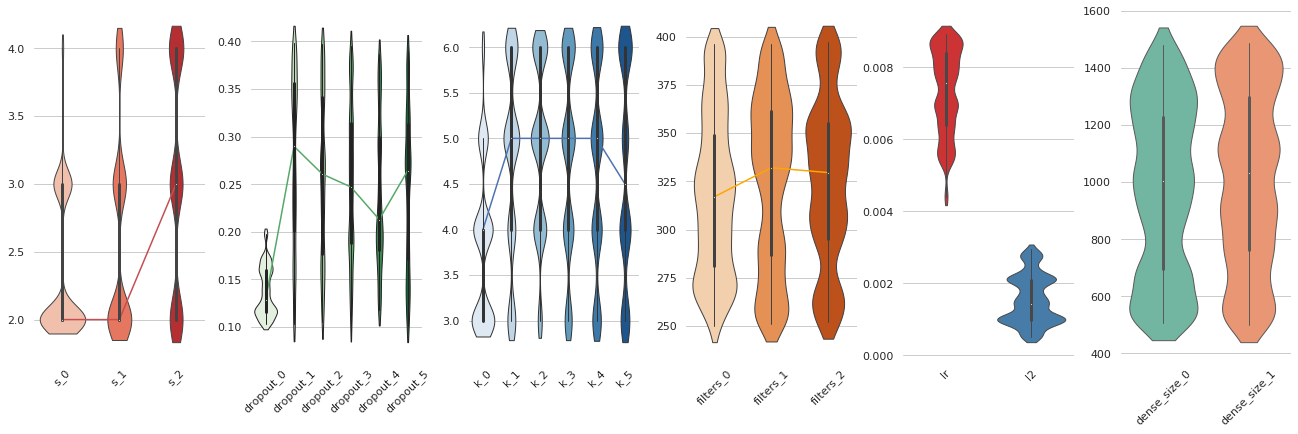

In [36]:
#top 10
for dataset in ["mnist","fashion","cifar10"]:
    data = pd.read_csv('results/zoomedIn/'+dataset+'-results.log', delimiter=',')
    data['filters_1'] = data['filters_2']
    data['filters_2'] = data['filters_4']
    data = data.drop(columns=['stack_0', 'stack_1', 'stack_2','activation', 'activ_dense', 'max_pooling', 'filters_3', 'filters_4','filters_5'])
    top10perf = data.quantile(.95)['perf']
    
    data = data[data['perf']>top10perf]
    print(len(data))
    
    data['s_0 x k_1'] = data['s_0'] + data['k_1']
    data['s_1 x k_3'] = data['s_1'] + data['k_3']
    data['s_2 x k_5'] = data['s_2'] + data['k_5']
    
    data['nr Params 0'] = data['filters_0'] * (data['k_0']**2 + 1)
    data['nr Params 1'] = data['filters_1'] * (data['k_1']**2 + 1)
    data['nr Params 2'] = data['filters_2'] * (data['k_2']**2 + 1)

    
    f, ax = plt.subplots(1,6,figsize=(18, 6))
    ax[0].plot( data[['s_0','s_1','s_2']].median(), color='r')
    #sns.violinplot(ax = ax[1], data=data[['s_0 x k_1','s_1 x k_3','s_2 x k_5']], palette="Reds", bw=.2, cut=1, linewidth=1)
    ax[1].plot( data[['dropout_0','dropout_1','dropout_2','dropout_3','dropout_4','dropout_5']].median(), color='g')
    ax[2].plot( data[['k_0','k_1','k_2','k_3','k_4','k_5']].median(), color='b')
    ax[3].plot( data[['filters_0','filters_1','filters_2']].median(), color='orange')
    #ax[4].plot( data[['nr Params 0','nr Params 1','nr Params 2']].median(), color='k')
    sns.violinplot(ax = ax[0], data=data[['s_0','s_1','s_2']], palette="Reds", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[1], data=data[['dropout_0','dropout_1','dropout_2','dropout_3','dropout_4','dropout_5']], palette="Greens", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[2], data=data[['k_0','k_1','k_2','k_3','k_4','k_5']], palette="Blues", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[3], data=data[['filters_0','filters_1','filters_2']], palette="Oranges", bw=.2, cut=1, linewidth=1)
    
    #sns.violinplot(ax = ax[4], data=data[['nr Params 0','nr Params 1','nr Params 2']], palette="Set1", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[4], data=data[['lr','l2']], palette="Set1", bw=.2, cut=1, linewidth=1)
    sns.violinplot(ax = ax[5], data=data[['dense_size_0','dense_size_1']], palette="Set2", bw=.2, cut=1, linewidth=1)
    for a in ax:
        a.set_xticklabels(a.get_xticklabels(),rotation=45)
    
    # Finalize the figure
    #ax.set(ylim=(-.7, 1.05))
    sns.despine(left=True, bottom=True)
    f.tight_layout(pad=0.5)
    plt.savefig(dataset+'-violin-2.pdf')
    plt.show()